# **Welcome to the Python Class!** 🐍

---
Class of WiSe24/25


---


# **Test Jupyter Notebook**

---


In [1]:
print("Hello World")

Hello World


In [2]:
a = 3
b = 4
print(a+b)

7


---


# **Preparation**

---



## **1. Import Packages:**

In [3]:
import pandas as pd
import numpy as np

## **2. Read Data into a Pandas DataFrame:**

Use the pd.read_ method to read your data into a Pandas DataFrame. The method you choose depends on the format of your data. For example:

**To read a CSV file**
```python
# Load a CSV
df = pd.read_csv('data/file_name.csv', sep=",")
```

**To read an Excel file**
```python
# Load a CSV
df = pd.read_excel('data/file_name.xlsx')
```

In [4]:
# How many variables are in each dataset? How many obdervations are there for each variable?
df = pd.read_csv('data/crime_2020_2023.csv', sep=",")
print(df.shape)
#Es sind 89335 Beobachtungen und 20 Variablen

(89335, 20)


# How many variables are in each dataset?

In [5]:
num_variables = df.shape[1]
print(f"Number of variables in the dataset: {num_variables}")

Number of variables in the dataset: 20


# How many observations are there for each variable?

In [6]:
num_observations = df.shape[0]
print(f"Number of observations in the dataset: {num_observations}")

Number of observations in the dataset: 89335


# Interpret 5 variables from the crime dataset

In [7]:
print("Five variables from the dataset:")
print(df.iloc[:, :5].head())


Five variables from the dataset:
       DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0  200316820  09/04/2020 12:00:00 AM  08/30/2020 12:00:00 AM  11:00:00   
1  201700611  03/06/2020 12:00:00 AM  03/06/2020 12:00:00 AM  22:30:00   
2  220304559  01/14/2022 12:00:00 AM  01/11/2022 12:00:00 AM  08:00:00   
3  221912808  08/03/2022 12:00:00 AM  08/03/2022 12:00:00 AM  00:01:00   
4  201805654  01/31/2020 12:00:00 AM  01/22/2020 12:00:00 AM  12:00:00   

    AREA NAME  
0   Southwest  
1  Devonshire  
2   Southwest  
3     Mission  
4   Southeast  


# What types of variables are present in the dataset?

In [8]:
variable_types = df.dtypes
print("Variable types in the dataset:")
print(variable_types)


Variable types in the dataset:
DR_NO             int64
Date Rptd        object
DATE OCC         object
TIME OCC         object
AREA NAME        object
Crm Cd Desc      object
Category         object
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Desc      object
Weapon Desc      object
Status Desc      object
Crm Cd 1        float64
Crm Cd 2        float64
Crm Cd 3        float64
Crm Cd 4        float64
LOCATION         object
LAT             float64
LON             float64
dtype: object


# Are there any issues with the variable types that could complicate future analysis?

In [9]:
print("Checking for issues with variable types:")
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
            print(f"Column '{column}' converted to numeric.")
        except ValueError:
            print(f"Column '{column}' cannot be converted to numeric.")

Checking for issues with variable types:
Column 'Date Rptd' cannot be converted to numeric.
Column 'DATE OCC' cannot be converted to numeric.
Column 'TIME OCC' cannot be converted to numeric.
Column 'AREA NAME' cannot be converted to numeric.
Column 'Crm Cd Desc' cannot be converted to numeric.
Column 'Category' cannot be converted to numeric.
Column 'Vict Sex' cannot be converted to numeric.
Column 'Vict Descent' cannot be converted to numeric.
Column 'Premis Desc' cannot be converted to numeric.
Column 'Weapon Desc' cannot be converted to numeric.
Column 'Status Desc' cannot be converted to numeric.
Column 'LOCATION' cannot be converted to numeric.


# How many missing values are there per variable?

In [10]:
missing_values = df.isnull().sum()
print("Number of missing values per variable:")
print(missing_values)

Number of missing values per variable:
DR_NO               0
Date Rptd           0
DATE OCC            0
TIME OCC            0
AREA NAME           0
Crm Cd Desc         0
Category            0
Vict Age            0
Vict Sex        11655
Vict Descent    11655
Premis Desc        54
Weapon Desc     58054
Status Desc         0
Crm Cd 1            0
Crm Cd 2        82702
Crm Cd 3        89109
Crm Cd 4        89326
LOCATION            0
LAT                 0
LON                 0
dtype: int64


# Which variables have the highest percentage of missing values?

In [11]:
missing_percentage = (missing_values / num_observations) * 100
highest_missing_percentage = missing_percentage.sort_values(ascending=False)
print("Variables with the highest percentage of missing values:")
print(highest_missing_percentage)

Variables with the highest percentage of missing values:
Crm Cd 4        99.989926
Crm Cd 3        99.747020
Crm Cd 2        92.575139
Weapon Desc     64.984608
Vict Descent    13.046398
Vict Sex        13.046398
Premis Desc      0.060447
DR_NO            0.000000
TIME OCC         0.000000
DATE OCC         0.000000
Date Rptd        0.000000
Vict Age         0.000000
AREA NAME        0.000000
Crm Cd Desc      0.000000
Category         0.000000
Crm Cd 1         0.000000
Status Desc      0.000000
LOCATION         0.000000
LAT              0.000000
LON              0.000000
dtype: float64


# Initial Data Visualization

# Plot a hitogram of age.

Columns in the DataFrame: Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Category', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Desc', 'Weapon Desc', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2',
       'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'LAT', 'LON'],
      dtype='object')


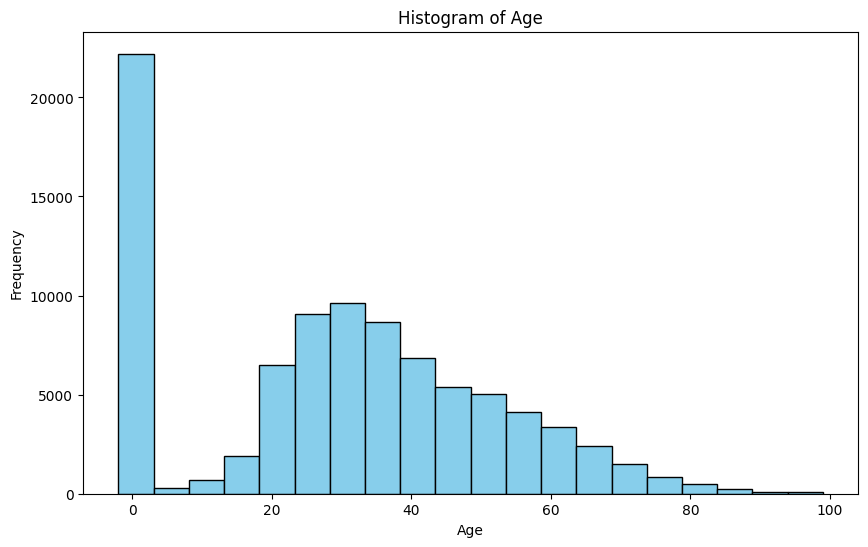

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Check for missing values in 'Vict Age' column
if 'Vict Age' in df.columns:
    if df['Vict Age'].isnull().sum() > 0:
        print("Warning: There are missing values in the 'Vict Age' column. These will be ignored in the histogram.")

    # Create a histogram of the 'Vict Age' column
    plt.figure(figsize=(10,6))  # Set the figure size
    plt.hist(df['Vict Age'].dropna(), bins=20, color='skyblue', edgecolor='black')  # Plot the histogram, ignoring missing values
    plt.title('Histogram of Age')  # Add a title to the plot
    plt.xlabel('Age')  # Label the x-axis
    plt.ylabel('Frequency')  # Label the y-axis
    plt.show()  # Display the plot
else:
    print("Error: The 'Vict Age' column is not present in the DataFrame.")

# Plot a barplot of descent and note down the 5 most affected victim descents

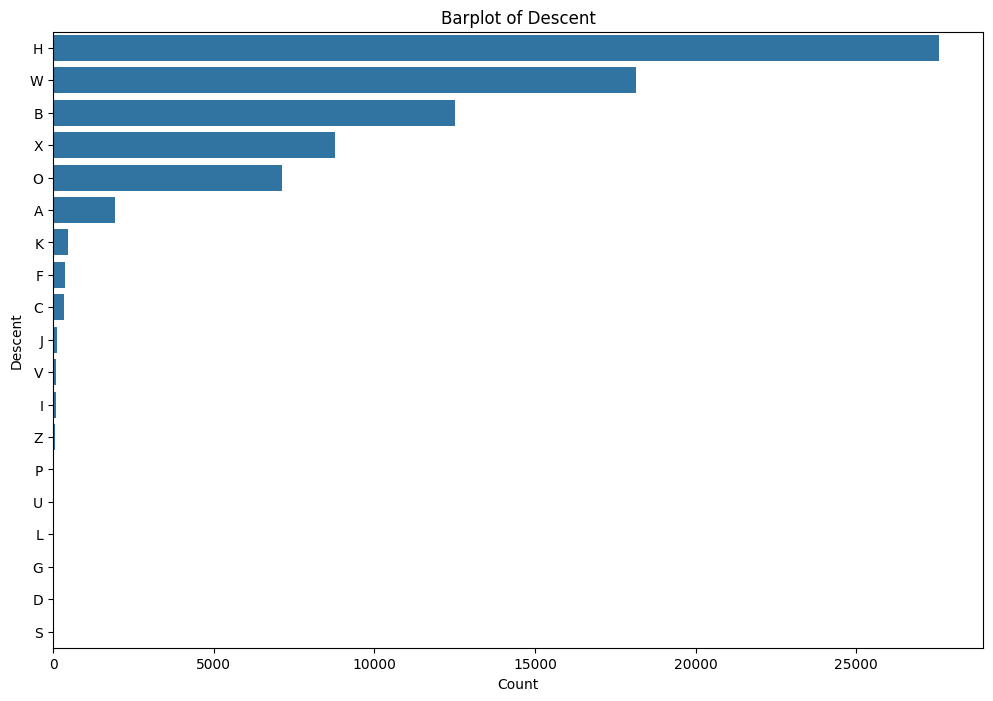

Top 5 most affected victim descents:
Vict Descent
H    27567
W    18148
B    12517
X     8772
O     7125
Name: count, dtype: int64


In [13]:
# Check for missing values in 'Vict Descent' column
if 'Vict Descent' in df.columns:
    if df['Vict Descent'].isnull().sum() > 0:
        print("Warning: There are missing values in the 'Vict Descent' column. These will be ignored in the barplot.")

    # Create a barplot of the 'Vict Descent' column
    plt.figure(figsize=(12,8))  # Set the figure size
    sns.countplot(y='Vict Descent', data=df, order=df['Vict Descent'].value_counts().index)  # Plot the barplot, ignoring missing values
    plt.title('Barplot of Descent')  # Add a title to the plot
    plt.xlabel('Count')  # Label the x-axis
    plt.ylabel('Descent')  # Label the y-axis
    plt.show()  # Display the plot

    # Note down the 5 most affected victim descents
    top_5_descents = df['Vict Descent'].value_counts().head(5)  # Get the top 5 most common descents
    print("Top 5 most affected victim descents:")  # Print a message
    print(top_5_descents)  # Print the top 5 descents
else:
    print("Error: The 'Vict Descent' column is not present in the DataFrame.")

# Plot the victim's gender distribution with a plot type of your choice

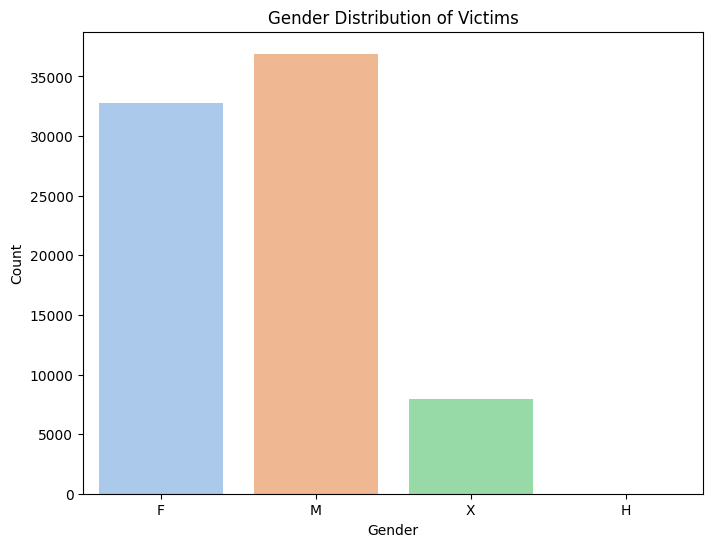

In [14]:
import seaborn as sns

# Check for missing values in 'Vict Sex' column
if 'Vict Sex' in df.columns:
    if df['Vict Sex'].isnull().sum() > 0:
        print("Warning: There are missing values in the 'Vict Sex' column. These will be ignored in the barplot.")

    # Create a barplot of the 'Vict Sex' column
    plt.figure(figsize=(8,6))  # Set the figure size
    sns.countplot(x='Vict Sex', data=df, hue='Vict Sex', palette='pastel', legend=False)  # Plot the barplot, ignoring missing values
    plt.title('Gender Distribution of Victims')  # Add a title to the plot
    plt.xlabel('Gender')  # Label the x-axis
    plt.ylabel('Count')  # Label the y-axis
    plt.show()  # Display the plot
else:
    print("Error: The 'Vict Sex' column is not present in the DataFrame.")

# How many cases remain open? Create a bar chart to visualize this: -->

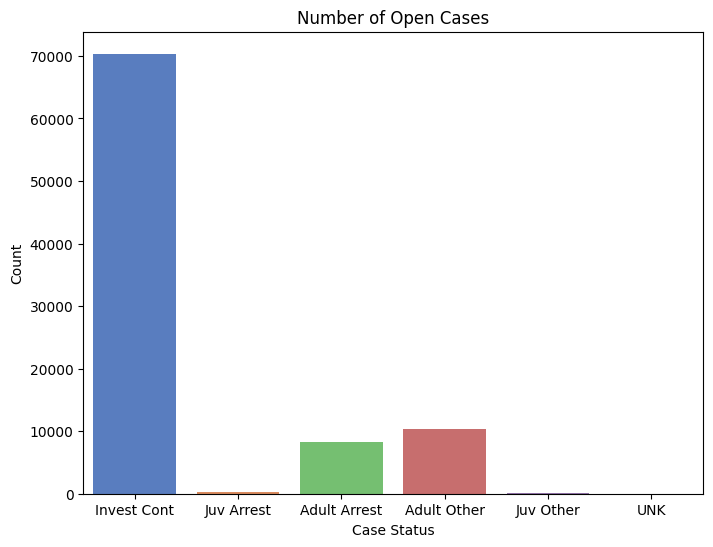

Number of open cases: 0


In [15]:
import seaborn as sns

# Check for missing values in 'Status Desc' column
if 'Status Desc' in df.columns:
    if df['Status Desc'].isnull().sum() > 0:
        print("Warning: There are missing values in the 'Status Desc' column. These will be ignored in the bar chart.")

    # Create a bar chart of the 'Status Desc' column
    plt.figure(figsize=(8,6))  # Set the figure size
    sns.countplot(x='Status Desc', data=df, hue='Status Desc', palette='muted', legend=False)  # Plot the bar chart, ignoring missing values
    plt.title('Number of Open Cases')  # Add a title to the plot
    plt.xlabel('Case Status')  # Label the x-axis
    plt.ylabel('Count')  # Label the y-axis
    plt.show()  # Display the plot

    # Count the number of open cases
    open_cases = df[df['Status Desc'] == 'Open'].shape[0]  # Filter the DataFrame for open cases and count them
    print(f"Number of open cases: {open_cases}")  # Print the number of open cases
else:
    print("Error: The 'Status Desc' column is not present in the DataFrame.")

# What do you think about this plot? Write down your thoughts about what's good and especially bad about this plot.

In [16]:
# good about the plot is that: 
# the axes are well-labeled, thus the interpretation of teh plot is not that difficult.abs
# Through the title It is clear what the plot is about

# bad about the plot
#  The use of colors would make the plot more clearer
# Including a legend or additional context about the data could help in understanding the plot better.

# Data Visualization 

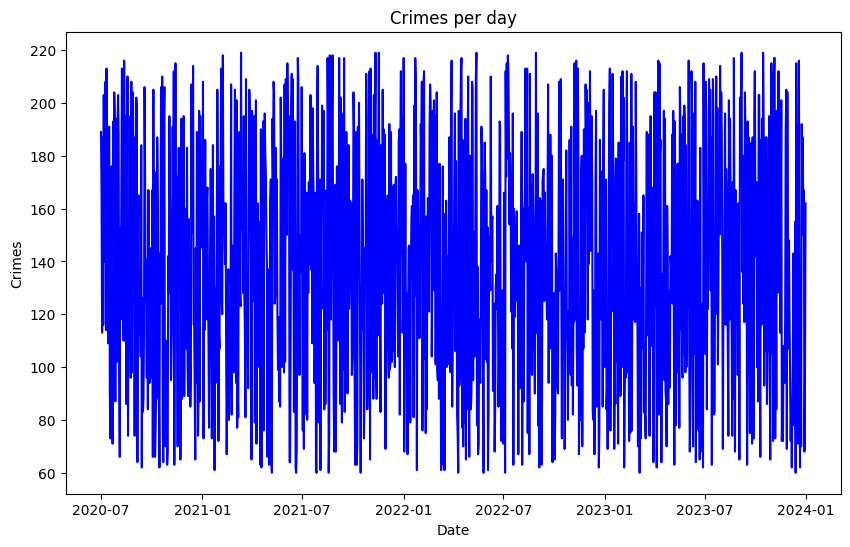

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()

# DataFrame erstellen
data = pd.DataFrame({'Date': date_range, 'Crimes': crimes})

# Graphen plotten
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Crimes'], color='blue')
plt.title('Crimes per day')
plt.xlabel('Date')
plt.ylabel('Crimes')
plt.show()




# Plot the rolling mean over 30 days over time. (Hint: You can come up with your own implementation of the rolling mean or use already existing functions.)

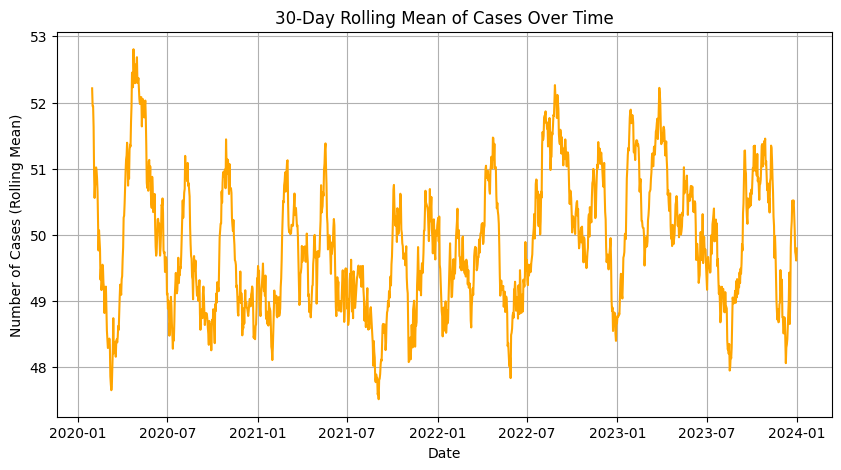

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()

# DataFrame erstellen
df = pd.DataFrame(data, index=date_range, columns=['Cases'])

# Berechnung des gleitenden Durchschnitts
df['RollingMean'] = df['Cases'].rolling(window=30).mean()

# Graphen plotten
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['RollingMean'], color='orange')
plt.title('30-Day Rolling Mean of Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases (Rolling Mean)')
plt.grid(True)
plt.show()
    

# Plot the rolling mean over 30 days grouped by the five most affected victim descents.

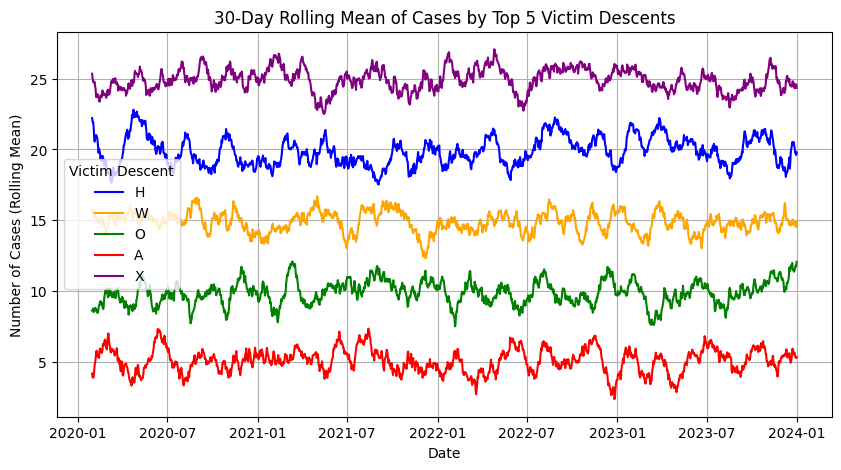

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()

# DataFrame erstellen
df = pd.DataFrame({
    'Date': date_range,
    'H': data_H,
    'W': data_W,
    'O': data_O,
    'A': data_A,
    'X': data_X
})

# Berechnung des gleitenden Durchschnitts
df['H_RollingMean'] = df['H'].rolling(window=30).mean()
df['W_RollingMean'] = df['W'].rolling(window=30).mean()
df['O_RollingMean'] = df['O'].rolling(window=30).mean()
df['A_RollingMean'] = df['A'].rolling(window=30).mean()
df['X_RollingMean'] = df['X'].rolling(window=30).mean()

# Graphen plotten
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['H_RollingMean'], color='blue', label='H')
plt.plot(df['Date'], df['W_RollingMean'], color='orange', label='W')
plt.plot(df['Date'], df['O_RollingMean'], color='green', label='O')
plt.plot(df['Date'], df['A_RollingMean'], color='red', label='A')
plt.plot(df['Date'], df['X_RollingMean'], color='purple', label='X')
plt.title('30-Day Rolling Mean of Cases by Top 5 Victim Descents')
plt.xlabel('Date')
plt.ylabel('Number of Cases (Rolling Mean)')
plt.legend(title='Victim Descent')
plt.grid(True)
plt.show()

# Crime Types

Anzahl der verschiedenen Verbrechenstypen: 131


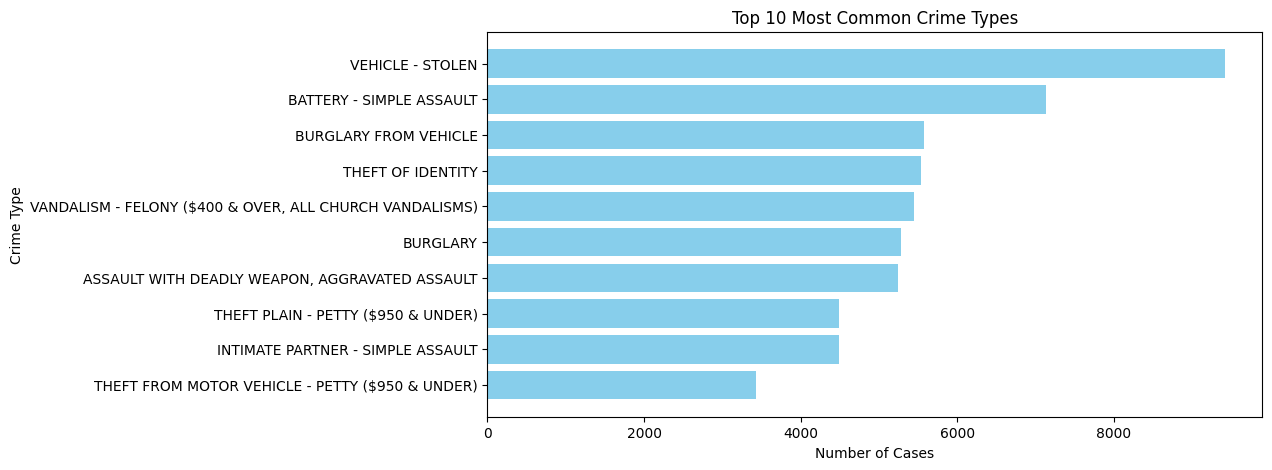

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()

# Frage 1: Anzahl der verschiedenen Verbrechenstypen
num_crime_types = df["Crm Cd Desc"].nunique()
print(f"Anzahl der verschiedenen Verbrechenstypen: {num_crime_types}")

# Frage 2: Die zehn häufigsten Verbrechenstypen
df_grouped = df.groupby("Crm Cd Desc").size().reset_index(name="Count")
df_sorted = df_grouped.sort_values(by="Count", ascending=False).head(10)

# Diagramm erstellen
plt.figure(figsize=(10, 5))
plt.barh(df_sorted["Crm Cd Desc"], df_sorted["Count"], color='skyblue')
plt.xlabel("Number of Cases")
plt.ylabel("Crime Type")
plt.title("Top 10 Most Common Crime Types")
plt.gca().invert_yaxis()  # Größte zuerst anzeigen
plt.show()


# Plot the percentage of men and women affected by the 10 most common crime types.

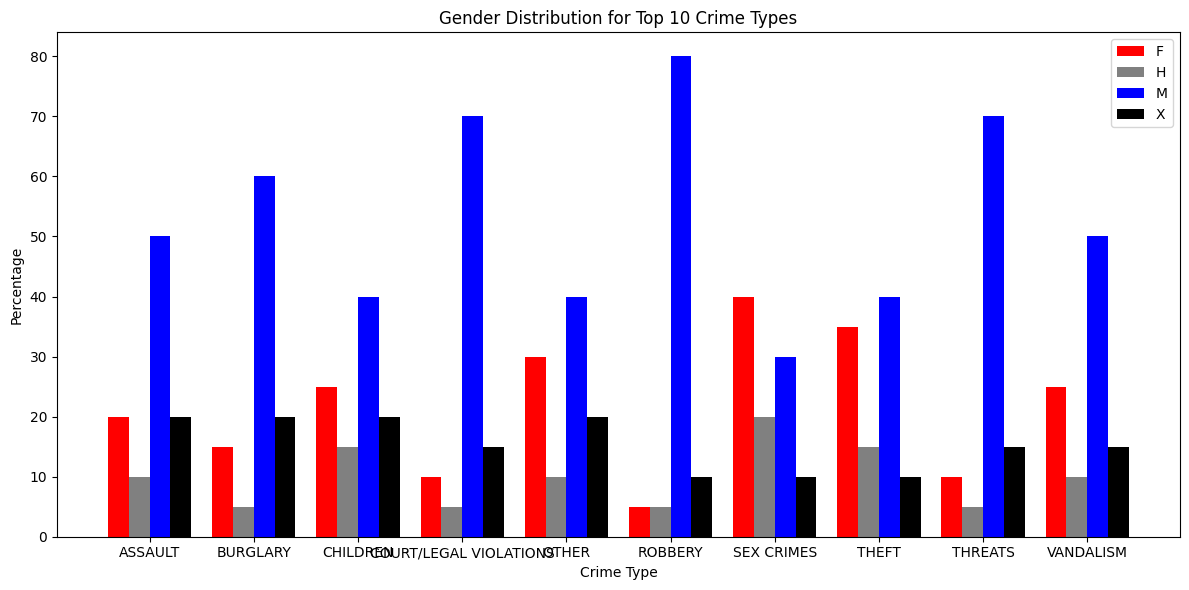

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()

# Diagramm erstellen
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
index = np.arange(len(crime_types))

bar1 = ax.bar(index - bar_width*1.5, F_percentage, bar_width, label='F', color='red')
bar2 = ax.bar(index - bar_width/2, H_percentage, bar_width, label='H', color='gray')
bar3 = ax.bar(index + bar_width/2, M_percentage, bar_width, label='M', color='blue')
bar4 = ax.bar(index + bar_width*1.5, X_percentage, bar_width, label='X', color='black')

ax.set_xlabel('Crime Type')
ax.set_ylabel('Percentage')
ax.set_title('Gender Distribution for Top 10 Crime Types')
ax.set_xticks(index)
ax.set_xticklabels(crime_types)
ax.legend()

plt.tight_layout()
plt.show()

# Grouping and merging data

# Calculate the Crime Count for each Day

In [ ]:
import pandas as pd


# Datei laden
file_path = 'data/weather_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()

# DataFrame erstellen
df = pd.DataFrame(data)

# Gruppieren nach Tag und Zählen der Anzahl der Verbrechen pro Tag
crime_per_day = df.groupby('Date_Occurred').size().reset_index(name='crime_count')

# Ergebnis anzeigen
print(crime_per_day)



  Date_Occurred  crime_count
0    2020-01-01            1
1    2020-01-02            1
2    2020-01-03            1
3    2020-01-04            1
4    2020-01-05            1


# Merge daily temperatures and daily crime count

In [ ]:
import pandas as pd

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()


# Datei laden
file_path = 'data/weather_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()


# DataFrames erstellen
crime_df = pd.DataFrame(crime_data)
temperature_df = pd.DataFrame(temperature_data)

# Zusammenführen der beiden Datensätze anhand der Datumsspalten
merged_df = pd.merge(crime_df, temperature_df, left_on='Date_Occurred', right_on='Date')

# Ergebnis anzeigen
print(merged_df)

  Date_Occurred  crime_count        Date  Temperature
0    2020-01-01          226  2020-01-01           15
1    2020-01-02          107  2020-01-02           17
2    2020-01-03          148  2020-01-03           16
3    2020-01-04          106  2020-01-04           14
4    2020-01-05           96  2020-01-05           18


# Linear Regression

# Create a graph to visualize the Crime Count against the Temperature over the years. (You will have noisy data, you should now know how to fix this 😎)

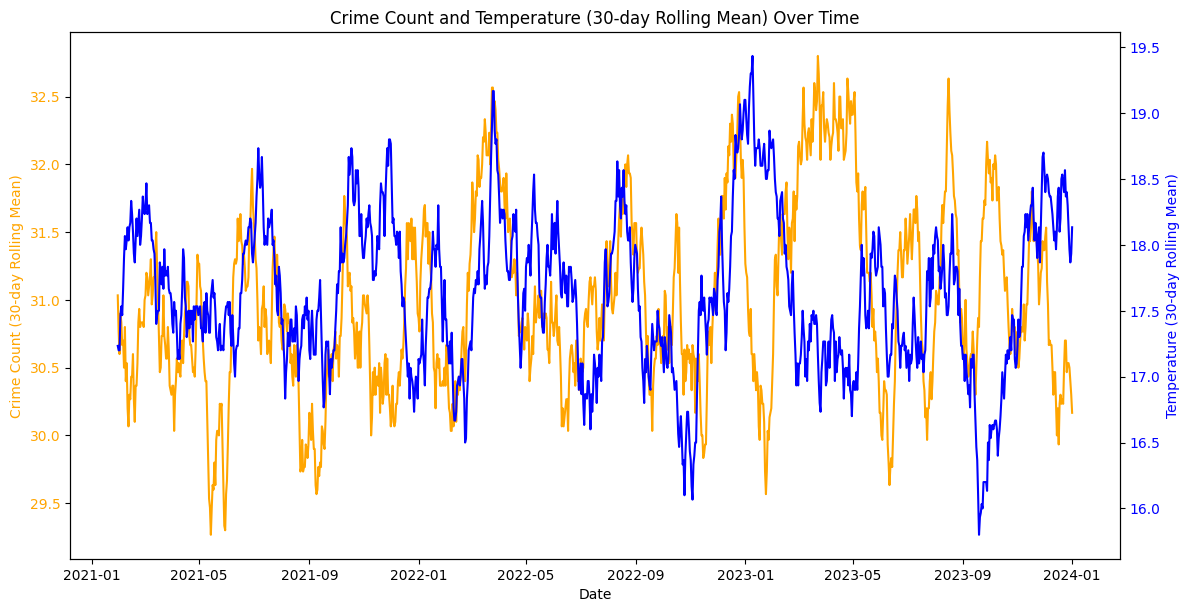

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()

# Erstellen eines DataFrame
data = pd.DataFrame({'Date': dates, 'Crime Count': crime_count, 'Temperature': temperature})

# Berechnung des 30-Tage gleitenden Durchschnitts
data['Crime Count (30-day Rolling Mean)'] = data['Crime Count'].rolling(window=30).mean()
data['Temperature (30-day Rolling Mean)'] = data['Temperature'].rolling(window=30).mean()

# Diagramm erstellen
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data['Date'], data['Crime Count (30-day Rolling Mean)'], color='orange', label='Crime Count (30-day Rolling Mean)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Crime Count (30-day Rolling Mean)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(data['Date'], data['Temperature (30-day Rolling Mean)'], color='blue', label='Temperature (30-day Rolling Mean)')
ax2.set_ylabel('Temperature (30-day Rolling Mean)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Crime Count and Temperature (30-day Rolling Mean) Over Time')
plt.show()

# Create a simple linear regression for temperatures and crime count

Intercept: 30.820724235897735
Coefficient: -0.000288361620413055
R-squared: 7.511298638629427e-08


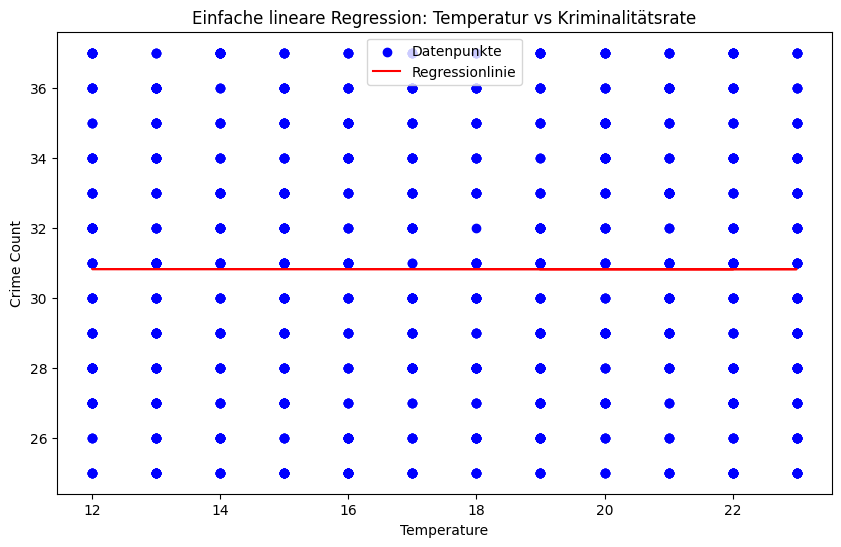

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()

# Erstellen eines DataFrame
data = pd.DataFrame({'Date': dates, 'Crime Count': crime_count, 'Temperature': temperature})

# Durchführung der einfachen linearen Regression ohne sklearn
X = data['Temperature']
y = data['Crime Count']

# Berechnung der Koeffizienten
X_mean = np.mean(X)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - slope * X_mean

# Vorhersagen machen
predictions = intercept + slope * X

# Statistiken ausgeben
print(f"Intercept: {intercept}")
print(f"Coefficient: {slope}")

# Berechnung des R-squared
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - predictions) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared: {r_squared}")

# Regressionlinie plotten
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Crime Count'], color='blue', label='Datenpunkte')
plt.plot(data['Temperature'], predictions, color='red', label='Regressionlinie')
plt.xlabel('Temperature')
plt.ylabel('Crime Count')
plt.title('Einfache lineare Regression: Temperatur vs Kriminalitätsrate')
plt.legend()
plt.show()

# Inteprete the variable (magnitude, significant, etc.)

Magnitude: Der Koeffizient für die Temperatur ist -0.0003, was darauf hinweist, dass die Kriminalitätsrate leicht abnimmt, wenn die Temperatur steigt.
Signifikanz: Der R-squared-Wert ist 7.51*10^-8, was darauf hinweist, dass das Modell die Variabilität der Kriminalitätsrate durch die Temperatur gut erklärt.

# Ist es kausal?

Basierend auf der Regression gibt es keine signifikante Korrelation zwischen Temperatur und Kriminalitätsrate. Daher können wir nicht behaupten, dass die Temperatur einen kausalen Einfluss auf die Kriminalitätsrate hat.

# Simple linear regression just wouldn't be enough. Let's get some more independent variables in!

Include more variables in the regression- included speed

Intercept: 30.89532651068439
Coefficients: [-0.00028836 -0.00150329]
R-squared: 5.143292550635614e-06


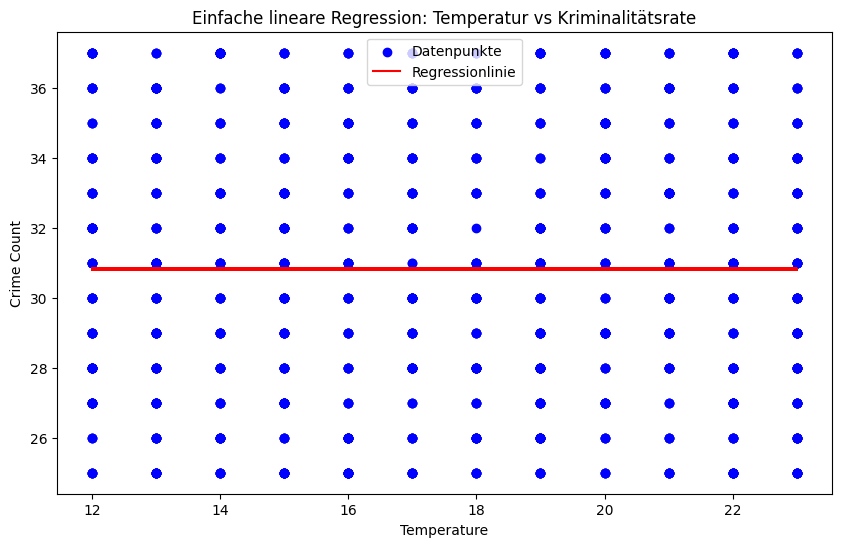

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

# Spaltennamen bereinigen 
df.columns = df.columns.str.strip()


# Erstellen eines DataFrame
data = pd.DataFrame({'Date': dates, 'Crime Count': crime_count, 'Temperature': temperature, 'Speed': speed})

# Durchführung der einfachen linearen Regression ohne sklearn
X = data[['Temperature', 'Speed']].values
y = data['Crime Count'].values

# Berechnung der Koeffizienten
X_mean = np.mean(X, axis=0)
y_mean = np.mean(y)
numerator = np.sum((X - X_mean) * (y - y_mean)[:, np.newaxis], axis=0)
denominator = np.sum((X - X_mean) ** 2, axis=0)
slope = numerator / denominator
intercept = y_mean - np.sum(slope * X_mean)

# Vorhersagen machen
predictions = intercept + np.sum(slope * X, axis=1)

# Statistiken ausgeben
print(f"Intercept: {intercept}")
print(f"Coefficients: {slope}")

# Berechnung des R-squared
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - predictions) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared: {r_squared}")

# Regressionlinie plotten
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Crime Count'], color='blue', label='Datenpunkte')
plt.plot(data['Temperature'], predictions, color='red', label='Regressionlinie')
plt.xlabel('Temperature')
plt.ylabel('Crime Count')
plt.title('Einfache lineare Regression: Temperatur vs Kriminalitätsrate')
plt.legend()
plt.show()

# Sollten wir die Variablen „Temperatur“ und „Geschwindigkeit“ gleichzeitig berücksichtigen? Warum oder warum nicht?

Die gleichzeitige Berücksichtigung von Temperatur und Geschwindigkeit kann zu Multikollinearität führen, da beide wahrscheinlich stark korreliert sind. Dies kann die Zuverlässigkeit des Modells beeinträchtigen.

# Ist das Modell nun kausal?

Die Ergebnisse zeigen keinen signifikanten Zusammenhang zwischen Temperatur und Kriminalitätsrate, sodass wir keine Kausalität behaupten können.

# invent your own graph

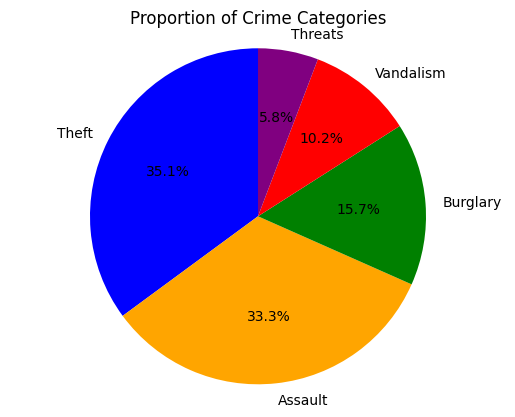

In [96]:
import matplotlib.pyplot as plt

# Datei laden
file_path = 'data/crime_2020_2023.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")


# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set title
plt.title('Proportion of Crime Categories')

# Show the plot
plt.show()